<a href="https://colab.research.google.com/github/AkankshaB123/fraud_detection_mitigation/blob/main/Data_Pre_Processing_and_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Next Steps**

1. Classification Models
*   Logistic Regression
*   XG Boost
*   SVM's
*   Decision Trees

2. Class Imbalance Solutions
*   Under Sampling
*   Over Sampling
*   SMOTE

3. Metrics
*   Accuracy Score
*   Confusion Matrix
*   ROC_AUC
*   F1 Score














In [ ]:
#1. Class Imbalance Solutions for Classification Problems
#2. Principal Component Analysis
#3. AUC ROC curve for model performance
#4. Modelling process, go through the code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Then run the notebook
# Correct the path to the notebook if necessary.
# Verify the file 'EDA.ipynb' exists in the specified location.
%run /content/drive/MyDrive/Colab\ Notebooks/EDA.ipynb

# **Random Under Sampling, Over Sampling and SMOTE**

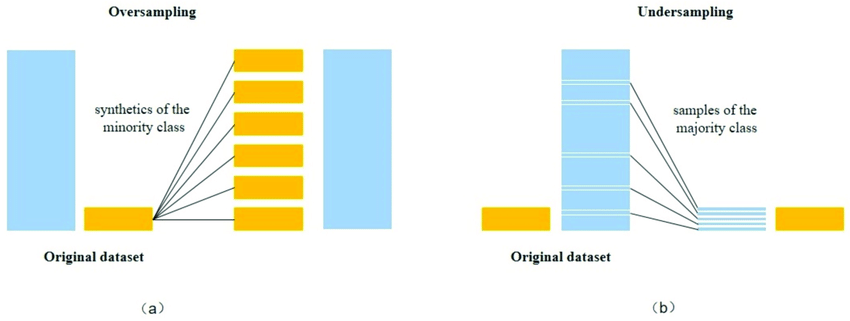

# **Random Undersampling**
1/Ensure randomness through random_state

In [22]:
# Shuffle original dataset
df = df.sample(frac=1, random_state=42)

# Separate majority and minority classes
fraud_df = df[df['Class'] == 1]       # Minority class (fraud)
non_fraud_df = df[df['Class'] == 0]   # Majority class (non-fraud)

# Randomly undersample the majority class to match the minority class count
non_fraud_undersampled_df = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Combine both classes (fraud and undersampled non-fraud)
undersampled_df = pd.concat([fraud_df, non_fraud_undersampled_df])

# Shuffle the new balanced DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(undersampled_df['Class'].value_counts())

# Preview
undersampled_df.head()

Class
0    492
1    492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,outliers
0,120776.0,2.058297,0.068332,-1.850650,0.215953,0.624085,-0.347072,0.047985,-0.042658,0.320167,...,0.284693,0.088880,-0.250671,0.179175,-0.069635,-0.045312,1.98,0,9.0,N
1,85576.0,-2.207631,3.259076,-5.436365,3.684737,-3.066401,-0.671323,-3.696178,1.822272,-3.049653,...,0.026754,-0.791489,0.176493,-0.136312,1.087585,0.373834,240.77,1,23.0,Y
2,150835.0,2.019438,0.075429,-1.614380,0.350498,0.334586,-0.676533,0.049558,-0.070849,0.302810,...,0.357381,0.655076,-0.331210,0.144425,-0.069690,-0.039965,1.29,0,17.0,N
3,75851.0,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,-3.097379,...,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,99.85,1,21.0,N
4,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1,17.0,N


# **Random Over Sampling**
1.   Option1: Manual Oversampling using Pandas
2.   Option2: Using RandomOverSampler from imblearn (preferred for modelling)

In [19]:
#Option1: Manual Oversampling using Pandas
import pandas as pd

# Shuffle original dataset
df = df.sample(frac=1, random_state=42)

# Separate majority and minority classes
fraud_df = df[df['Class'] == 1]       # Minority class
non_fraud_df = df[df['Class'] == 0]   # Majority class

# Oversample fraud (minority) class to match majority count
fraud_oversampled_df = fraud_df.sample(n=len(non_fraud_df), replace=True, random_state=42)

# Combine oversampled minority with majority class
oversampled_df = pd.concat([fraud_oversampled_df, non_fraud_df])

# Shuffle the new balanced DataFrame
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(oversampled_df['Class'].value_counts())

# Preview
oversampled_df.head()

Class
0    284315
1    284315
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,outliers
0,122212.0,1.947887,-0.712925,-0.450815,-0.744230,-0.963880,-0.814665,-0.599399,0.018778,1.375448,...,0.419842,0.062814,-0.715378,0.261042,-0.055017,-0.054126,31.00,0,9.0,N
1,39268.0,1.478665,-0.637531,-0.364055,-2.311806,-0.697885,-1.127284,-0.183692,-0.315772,0.034193,...,0.176938,-0.514923,0.222385,-0.430279,0.009726,0.015985,19.00,0,10.0,N
2,45541.0,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,...,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1.00,1,12.0,N
3,171042.0,-0.593250,0.814954,-0.473409,-0.522724,0.140995,-0.896373,0.491457,0.298883,-0.112226,...,0.245595,0.015406,-0.743970,0.122830,-0.093093,0.005600,22.57,0,23.0,N
4,81471.0,-0.593722,0.016463,2.382926,-2.140646,-0.376857,-0.275359,0.057823,0.006470,1.127329,...,-0.483161,0.066330,0.380092,0.122486,-0.087502,-0.163151,1.00,0,22.0,N


In [20]:
from imblearn.over_sampling import RandomOverSampler
#Option2: Using RandomOverSampler from imblearn (preferred for modelling)
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

# Combine back into a DataFrame
model_ready_df = pd.concat([pd.DataFrame(X_oversampled, columns=X.columns),
                            pd.Series(y_oversampled, name='Class')], axis=1)

# Check class distribution
print(model_ready_df['Class'].value_counts())

# Preview
model_ready_df.head()

Class
1    284315
0    284315
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hour,outliers,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,11.0,Y,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,12.0,Y,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,9.0,N,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,22.0,N,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,22.0,N,0


# **SMOTE**

Step 1: Encoding Categorical Columns

In [27]:
from sklearn.preprocessing import LabelEncoder

# If you have categorical columns, you should encode them
X_encoded = X.copy()

# Example: Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# If 'Class' column (y) is categorical, convert it to numeric as well
y_encoded = label_encoder.fit_transform(y)

Step 2: Apply SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_encoded, y_encoded)

# Combine back into a DataFrame
smote_balanced_df = pd.concat([pd.DataFrame(X_smote, columns=X_encoded.columns),
                               pd.Series(y_smote, name='Class')], axis=1)

# Check new class distribution
print(smote_balanced_df['Class'].value_counts())

# Preview the result
smote_balanced_df.head()

Class
1    284315
0    284315
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hour,outliers,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,11.0,1,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,12.0,1,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,9.0,0,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,22.0,0,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,22.0,0,0


**Data Frame Summary:**

1.   Random Under Sampling - undersampled_df
2.   Manual Oversampling	- oversampled_df
3.   RandomOverSampler - model_ready_df
4.   SMOTE - smote_balanced_df

